In [8]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import (linspace, sin, cos, pi)
from numpy.fft import rfft, rfftfreq
from sklearn.decomposition import FastICA

In [9]:
x = linspace(0, 3000, 3000)  # возвращает равномерно распределённые числа в данном интервале

a0 = 1
a1 = 0.75
a2 = 4.75
w0 = 0.18
w1 = 0.172
w2 = 0.02
k = 0.000002

data_1 = (np.random.random(1000))

# T= 2*pi
f1 = np.exp(-k*x**2)*(a0*sin(2 * pi * w0 * x + 2 * pi * 0.00) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.00) + a2*cos(2 * pi * w2 * x + 2 * pi * 0.00)) + [2*x for x in (np.random.rand(3000) - 0.5)]
f2 = np.exp(-k*x**2)*(a0*sin(2 * pi * w0 * x + 2 * pi * 0.00425) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.00425) + a2*cos(2 * pi * w2 * x + 2 * pi * 0.00425)) + [2*x for x in (np.random.rand(3000) - 0.5)]
f3 = np.exp(-k*x**2)*(a0*sin(2 * pi * w0 * x + 2 * pi * 0.0085) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.0085) + a2*cos(2 * pi * w2 * x + 2 * pi * 0.0085)) + [2*x for x in (np.random.rand(3000) - 0.5)]
f4 = np.exp(-k*x**2)*(a0*sin(2 * pi * w0 * x + 2 * pi * 0.01275) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.01275) + a2*cos(2 * pi * w2 * x + 2 * pi * 0.01275)) + [2*x for x in (np.random.rand(3000) - 0.5)]

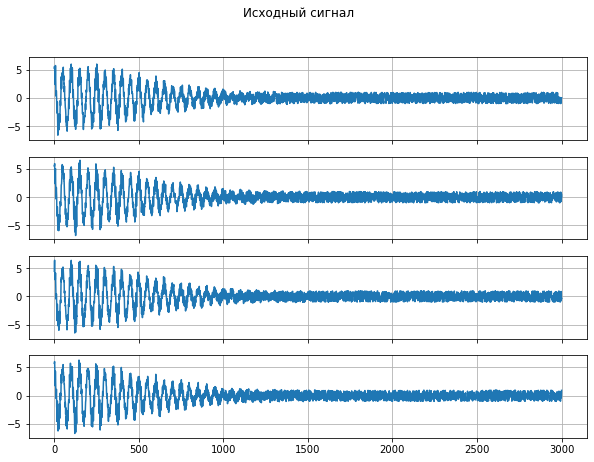

In [10]:
nrows, ncols = 4, 1
figsize = [10, 7]
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True, sharey=True)
fig.suptitle('Исходный сигнал')
ax[0].plot(x, f1)
ax[0].grid(True)
ax[1].plot(x, f2)
ax[1].grid(True)
ax[2].plot(x, f3)
ax[2].grid(True)
ax[3].plot(x, f4)
ax[3].grid(True)

plt.show()


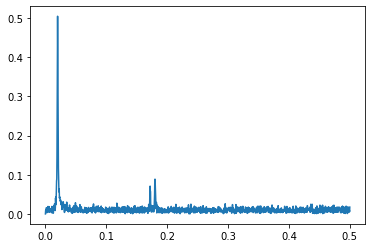

In [11]:
spectrs = rfft(f1 - np.mean(f1)) / (len(x))
nu = rfftfreq(3000, 1.)
plt.plot(nu, np.abs(spectrs))

In [12]:
Mas = np.c_[f1, f2, f3, f4]
ica = FastICA(n_components=4)
S_ = ica.fit_transform(Mas)

spectrf = rfft(Mas - np.mean(Mas)) / (len(x))
nu = rfftfreq(3000, 1.)


(3000,)


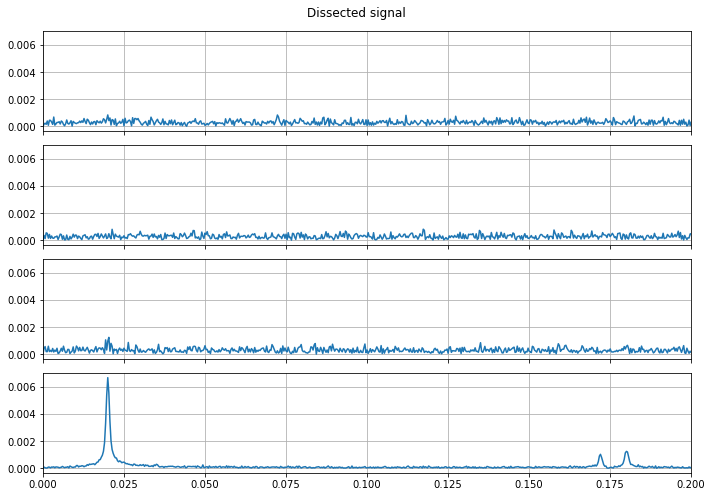

In [13]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True, sharey=True)
fig.suptitle('Dissected signal')
print(S_[:, 1].shape)
for i in range(S_.shape[1]):
    spectrf = rfft(S_[:, i] - np.mean(S_[:, i])) / (len(S_[:, i]))
    ax[i].plot(nu, np.abs(spectrf))
    #ax[i].plot(x,np.abs(S_[:, i]))
    ax[i].grid(True)


axes = plt.gca()
axes.set_xlim([0.0, 0.2])
plt.tight_layout()
plt.show()